# Pengumpulan Data

In [2]:
import pandas as pd

data = pd.read_csv('K02_diabetes.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Preprocessing Data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
for col in data:
    if data[col].dtype == 'object':
        data[col] = encode.fit_transform(data[col])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [5]:
X = data.drop('diabetes', axis=1)
Y = data['diabetes']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

# Pembentukan Model

In [7]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

# Analisis Akurasi Model

In [9]:
print(f'Akurasi Model: {model.score(x_train, y_train)}')

Akurasi Model: 0.9033625


# Pengujian Model

In [11]:
predik = model.predict(x_test)
predik

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

# Visualisasi Model

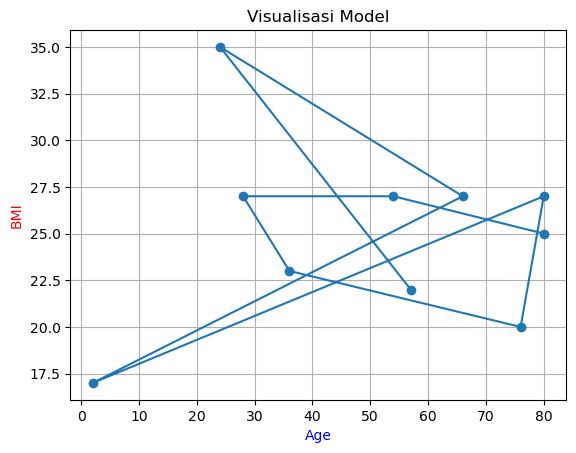

In [18]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([80, 54, 28, 36, 76, 80, 2, 66, 24, 57])
y = np.array([25, 27, 27, 23, 20, 27, 17, 27, 35, 22])

plt.plot(x, y, marker='o')
plt.grid()

plt.xlabel('Age', c='blue')
plt.ylabel('BMI', c='red')
plt.title('Visualisasi Model')
plt.show()